In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
def image_segmentation(images, k):
    t1 =time()
    
    # load the image 
    image = cv2.imread(images)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image, dtype=np.float64) / 255

    # shape of the original image (for reconstruction of the image)
    w, h, d = tuple(image.shape)

    # reshaping the image to 2D array
    image_2D = image.reshape((-1, 3))
    image_2D = np.float32(image_2D)
    
    # extract a sample of the image for gain speed in execution
    image_array_sample = shuffle(image_2D, random_state=0)[:1000]

    # applying K-Means
    kmeans = KMeans(k, random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_2D)
    centers = kmeans.cluster_centers_

    # recreate the image
    d = centers.shape[1]
    image_out = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image_out[i][j] = centers[labels[label_idx]]
            label_idx += 1

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    axs[0].set_title('segmented image')
    axs[0].imshow(image_out)

    axs[1].set_title('original image')
    axs[1].imshow(image)

    plt.show()
    print("done in %0.3fs." % (time() - t1))

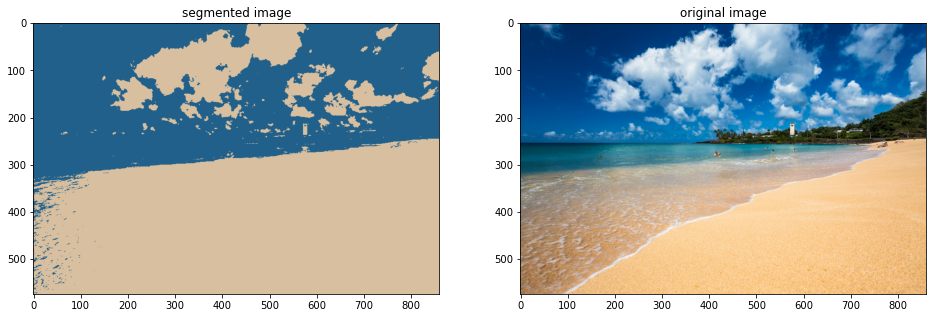

done in 1.547s.


In [3]:
image_segmentation("image3.jpg", 2)

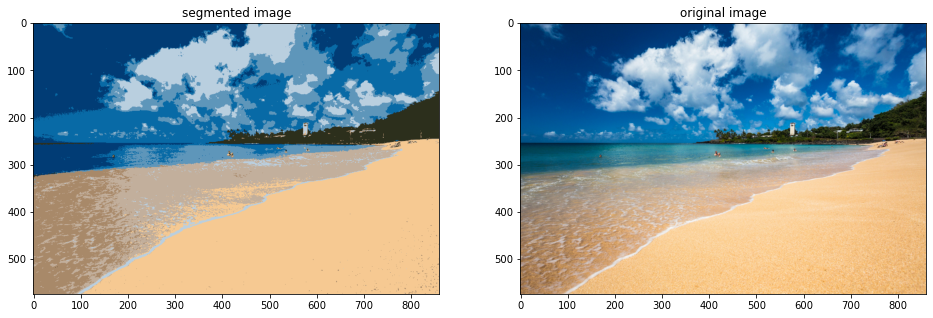

done in 1.632s.


In [4]:
image_segmentation("image3.jpg", 8)